----

![](./images/2.png)

# Resampling with `imblearn` package:

Installing the package:

In [1]:
# %%bash
# source activate py27
# pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

## Multiclass classification with under-sampling with `imblearn`:

* Some balancing methods allow for balancing dataset with multiples classes. 
* Here is an example to illustrate the use of those methods.

In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [2]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

In [10]:
RANDOM_STATE = 42

# Create a folder to fetch the dataset
iris = load_iris()

# Make the dataset imbalanced
# Select only half of the first class
iris.data = iris.data[25:-1, :]
iris.target = iris.target[25:-1]

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=RANDOM_STATE)

In [11]:
# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2, random_state=RANDOM_STATE), LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00         8
          1       1.00      0.73      1.00      0.84      0.93      0.88        11
          2       0.80      1.00      0.84      0.89      0.89      0.78        12

avg / total       0.92      0.90      0.94      0.90      0.94      0.87        31



## make_imbalance method with `imblearn`:

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from imblearn.datasets import make_imbalance

# Generate the dataset
X, y = make_moons(n_samples=500, shuffle=True, noise=0.5, random_state=10)

In [6]:
def plot_decoration(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-4, 4])

/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/imblearn/datasets/imbalance.py:109: DeprecationWarning: 'min_c_' is deprecated in 0.2 and will be removed in 0.4. Use 'ratio' as dictionary instead.
  DeprecationWarning)
/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/imblearn/datasets/imbalance.py:112: DeprecationWarning: 'ratio' being a float is deprecated in 0.2 and will not be supported in 0.4. Use a dictionary instead.
  DeprecationWarning)
/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/imblearn/datasets/imbalance.py:109: DeprecationWarning: 'min_c_' is deprecated in 0.2 and will be removed in 0.4. Use 'ratio' as dictionary instead.
  DeprecationWarning)
/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/imblearn/datasets/imbalance.py:112: DeprecationWarning: 'ratio' being a float is deprecated in 0.2 and will not be supported in 0.4. Use a dictionary instead.
  DeprecationWarning)
/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packa

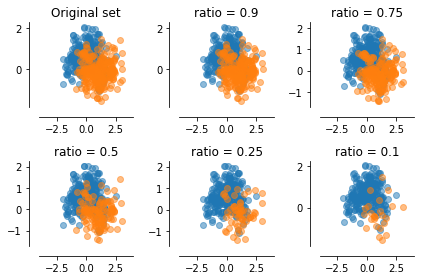

In [7]:
# import warnings
# warnings.filterwarnings("ignore")

# Two subplots, unpack the axes array immediately
f, axs = plt.subplots(2, 3)

axs = [a for ax in axs for a in ax]
axs[0].scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
axs[0].scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
axs[0].set_title('Original set')
plot_decoration(axs[0])

ratios = [0.9, 0.75, 0.5, 0.25, 0.1]
for i, ratio in enumerate(ratios, start=1):
    ax = axs[i]

    X_, y_ = make_imbalance(X, y, ratio=ratio, min_c_=1)
    ax.scatter(X_[y_ == 0, 0], X_[y_ == 0, 1], label="Class #0", alpha=0.5)
    ax.scatter(X_[y_ == 1, 0], X_[y_ == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title('ratio = {}'.format(ratio))
    plot_decoration(ax)

plt.tight_layout()
plt.show()

## Undersampling Pipelines with `imblearn`:

In [14]:
from sklearn.cross_validation import train_test_split as tts
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)

/Users/jay/miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=1.25, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0.02,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=15000, random_state=10)

In [16]:
# Create the samplers
enn = EditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours()

# Create the classifier
lr = LogisticRegression()

# Make the splits
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

# Add one transformers and two samplers in the pipeline object
pipeline = make_pipeline(enn, renn, lr)

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

print(classification_report(y_test, y_hat))

             precision    recall  f1-score   support

          0       0.91      0.83      0.87       378
          1       0.98      0.99      0.99      3372

avg / total       0.97      0.97      0.97      3750



## SMOTE with `imblearn`:

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

In [18]:
# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=80, random_state=10)

In [19]:
# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

In [20]:
# Apply SMOTE
kind = ['regular', 'borderline1', 'borderline2', 'svm']
sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

In [21]:
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

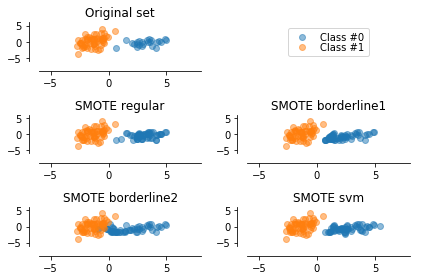

In [22]:
# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')


for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)


plt.tight_layout()
plt.show()

## Plotting Validation Curves with `sklearn` and `imblearn`:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn import datasets, metrics, tree

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

RANDOM_STATE = 42
scorer = metrics.make_scorer(metrics.cohen_kappa_score)

In [24]:
# Generate the dataset
X, y = datasets.make_classification(n_classes=2, class_sep=2,
                                    weights=[0.1, 0.9], n_informative=10,
                                    n_redundant=1, flip_y=0, n_features=20,
                                    n_clusters_per_class=4, n_samples=5000,
                                    random_state=RANDOM_STATE)

In [25]:
smote = SMOTE(random_state=RANDOM_STATE)
cart = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
pipeline = make_pipeline(smote, cart)

In [26]:
param_range = range(1, 11)
train_scores, test_scores = validation_curve(pipeline, X, y, \
                                             param_name="smote__k_neighbors", \
                                             param_range=param_range, \
                                             cv=3, \
                                             scoring=scorer, \
                                             n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

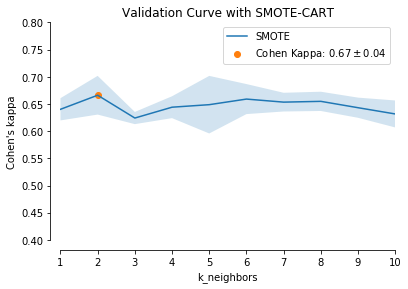

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(param_range, test_scores_mean, label='SMOTE')
ax.fill_between(param_range, test_scores_mean + test_scores_std, test_scores_mean - test_scores_std, alpha=0.2)

idx_max = np.argmax(test_scores_mean)
plt.scatter(param_range[idx_max], test_scores_mean[idx_max], \
            label=r'Cohen Kappa: ${0:.2f}\pm{1:.2f}$'.format(test_scores_mean[idx_max], test_scores_std[idx_max]))

plt.title("Validation Curve with SMOTE-CART")
plt.xlabel("k_neighbors")
plt.ylabel("Cohen's kappa")

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([1, 10])
plt.ylim([0.4, 0.8])

plt.legend(loc="best")
plt.show()

## Algorithmic Approach:

In [1]:
from sklearn.metrics import make_scorer

# Complete the exercise